# Pesquisa Operacional - Trabalho Prático II
# $K$-Clique e Conjunto Independente
## Luiz Henrique De Melo Santos
## Otávio Augusto Silva

In [1]:
import mip
import networkx
from matplotlib import pyplot

Using Python-MIP package version 1.6.0


In [2]:
n1 = 2 ** 8
n2 = 2 ** 9

In [3]:
g = networkx.to_undirected(networkx.complete_bipartite_graph(n1, n2))
n = len(g.nodes)
print("Nodes:", len(g.nodes))
print("Edges:", len(g.edges))

Nodes: 768
Edges: 131072


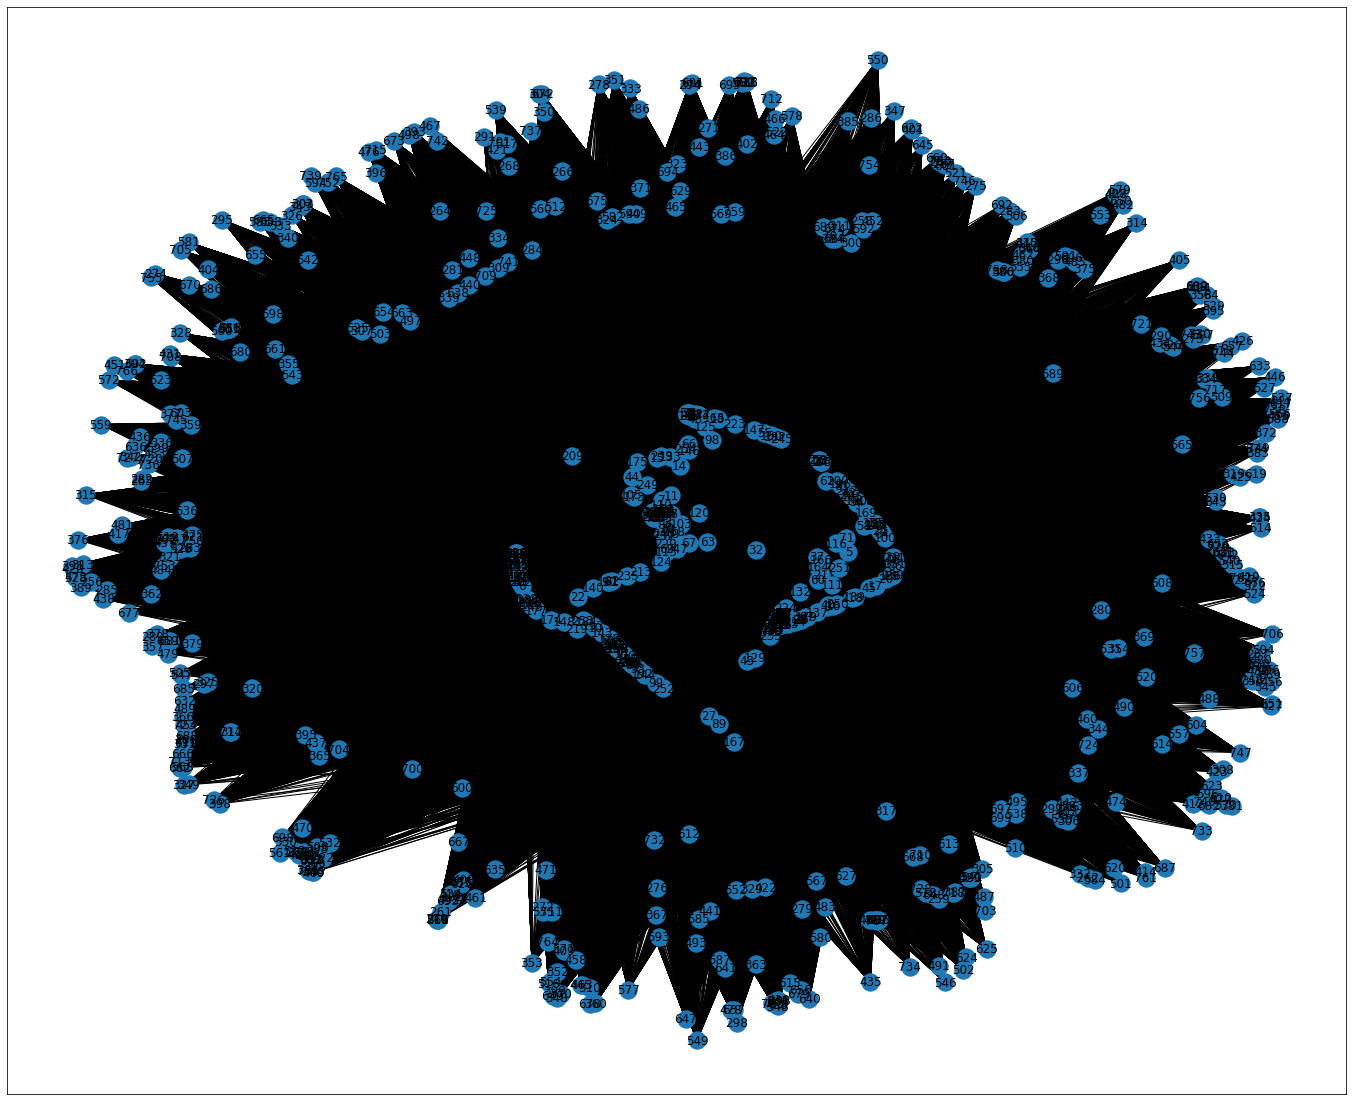

In [4]:
_, axis = pyplot.subplots(figsize=(24, 20))
networkx.drawing.draw_networkx(g, ax=axis)
pyplot.draw()

## Modelagem (Conjunto Independente)

In [5]:
model = mip.Model("Independent Set")

In [6]:
x = [model.add_var(var_type=mip.BINARY) for _ in range(n)]

In [7]:
model.objective = mip.maximize(mip.xsum(i for i in x))

In [8]:
g_ = networkx.complement(g)

In [9]:
for (i, j) in g_.edges:
    model += mip.xsum([x[i], x[j]]) <= 1

In [ ]:
%time model.optimize()

In [ ]:
selected = [i for i in range(n) if x[i].x >= 0.99]
print("Objective Value:", len(selected))
print("Selected nodes:", selected)

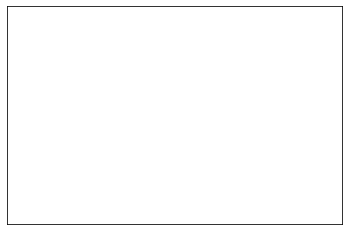

In [9]:
g1 = g.subgraph(selected)
_, axis = pyplot.subplots(figsize=(24, 20))
networkx.drawing.draw_networkx(g1, ax=axis)
pyplot.show()

## Modelagem (Clique)

In [ ]:
model = mip.Model("Clique")

In [ ]:
x = [model.add_var(var_type=mip.BINARY) for _ in range(n)]

In [ ]:
model.objective = mip.maximize(mip.xsum(i for i in x))

In [ ]:
for (i, j) in networkx.complement(g).edges:
    model += mip.xsum([x[i], x[j]]) <= 1

In [ ]:
%time model.optimize()

In [ ]:
selected = [i for i in range(n) if x[i].x >= 0.99]
print("Objective Value:", len(selected))
print("Selected nodes:", selected)

In [ ]:
g1 = g.subgraph(selected)
_, axis = pyplot.subplots(figsize=(24, 20))
networkx.drawing.draw_networkx(g1, ax=axis)
pyplot.show()